In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import random
sns.set_theme()
%matplotlib inline
# plt.style.use('presentation.mplstyle')

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [3]:
def get_value_count(attr):
    print(netflix_df[attr].value_counts())

In [4]:
get_value_count('country')

United States                          2032
India                                   777
United Kingdom                          348
Japan                                   176
Canada                                  141
                                       ... 
Netherlands, Germany, Italy, Canada       1
Netherlands, Denmark, South Africa        1
Cyprus, Austria, Thailand                 1
South Korea, China, United States         1
China, United States, Australia           1
Name: country, Length: 554, dtype: int64


In [5]:
# Checking if any of the columns have a missing value
netflix_df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

In [6]:
# Number of missing entries in each column
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
# Total number of missing entries
netflix_df.isnull().sum().sum()

3036

In [8]:
# Imputing the missing data for the categorical attributes with undefined
for attr in ['director', 'cast', 'country']:
    netflix_df[attr].fillna('Undefined', inplace=True)
# Dropping the missing data for the numerical values
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [9]:
# Checking if the data is clean
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [10]:
# Checking for the index where we have duplicate rows
np.where(netflix_df.duplicated() == True)

(array([], dtype=int64),)

# Data Visualization

  ## Netflix content

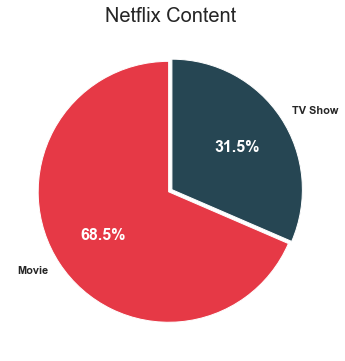

In [11]:
# Setting the size for the labels
font = {'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(12, 6))
plt.title('Netflix Content', fontsize=20)
piechart = plt.pie(netflix_df.type.value_counts(), # the data (df)
                   explode=(0.015, 0.015), # the gap between the pies, we need to define the explode for each of the splits, here only 2
                   labels=netflix_df.type.value_counts().index,  # labels of the data 
                   colors=['#e63946','#264653'], # color for each of the division
                   startangle=90, # for rotating the pie chart by the given angle
                   autopct='%1.1f%%') # Providing percentage inside the division
# getting the percentage divison values and setting their color to white. This will only work if autopct is set in the piechart
for division_text in piechart[2]:
    division_text.set_color('white')
plt.show()

## Amount of content added across the years

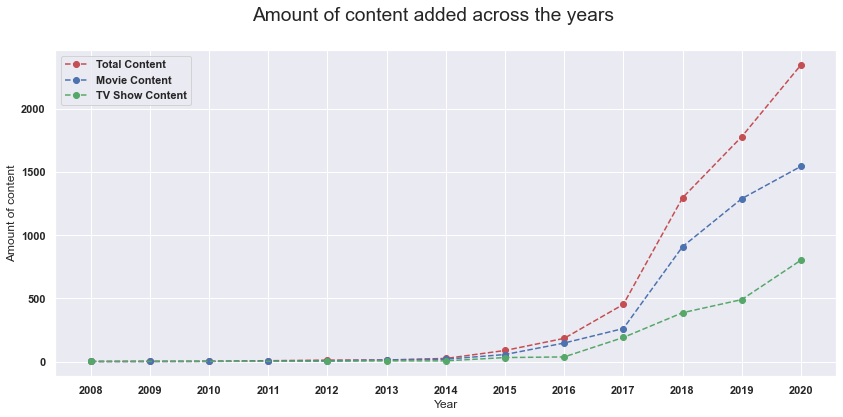

In [12]:
# Adding a new attribute to store the year of adding the content
netflix_df['year'] = netflix_df['date_added'].apply(lambda x: x[-4:])

# Plotting using a line plot 
fig, ax = plt.subplots(figsize=(14,6))
fig.suptitle('Amount of content added across the years')

# sorted(netflix_df['year'].unique() gives ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
# sorted(netflix_df['year'].value_counts() gives [1, 2, 2, 7, 12, 13, 25, 88, 184, 453, 1297, 1781, 2349]
ax.plot(sorted(netflix_df['year'].unique()), sorted(netflix_df['year'].value_counts()), '--o', c='r', label='Total Content')

movie_df = netflix_df[netflix_df['type'] == 'Movie'] # Movies only
ax.plot(sorted(movie_df['year'].unique()), sorted(movie_df['year'].value_counts()), '--o', label='Movie Content')

tvshow_df = netflix_df[netflix_df['type'] == 'TV Show'] # TV Shows only
ax.plot(sorted(tvshow_df['year'].unique()), sorted(tvshow_df['year'].value_counts()), '--o', c='g', label='TV Show Content')

ax.set_xlabel('Year')
ax.set_ylabel('Amount of content')
plt.legend() # This needs to be written if you wanna display the labels in the left corner
plt.show()

## Countries

In [13]:
# Getting the count of each country
# expand = True -> Expands each split row as a pandas series
# stack -> stacks downs each of the data from split row as a secondary entry (new level)
# For ex: 0     0     United States
#               1             India
#               2       South Korea
#               3             China
#         1     0    United Kingdom
# reset_index -> starts a new df with both the levels (0&1)
# level=1 -> Only a single level 
# drop=True -> Drops the level
# country_filter_df['country'].str.split(", ", expand=True).stack().reset_index(level=1)
country_data = netflix_df.country.str.split(', ', expand=True).stack().reset_index(drop=True)

# Removing the undefined values
country_data = country_data[country_data != 'Undefined']

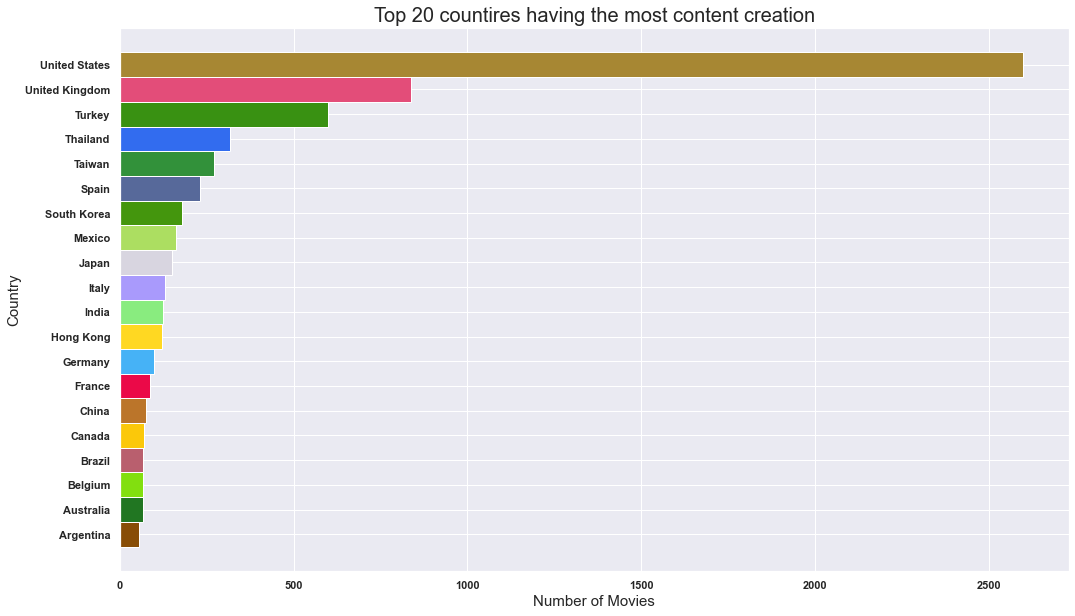

In [14]:
# Plotting the bar graph
# colors

def get_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
    return color

# Since there are 113 countries, I am going to show the top 20 here
fig = plt.figure(figsize=(17,10))
plt.barh(sorted(country_data.value_counts()[:20].index), sorted(country_data.value_counts()[:20]), height=1, color=get_colors(20))
plt.title('Top 20 countires having the most content creation', fontsize=20)
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.show()

## Count of Movies for each Rating

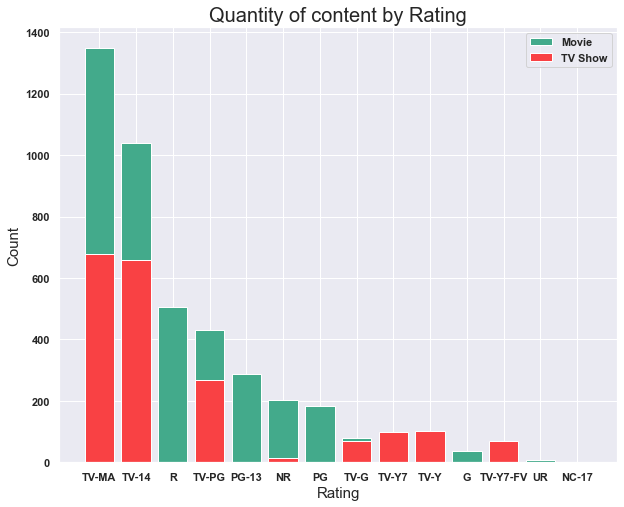

In [63]:
# Plotting a bar

tvshow_rating = tvshow_df['rating'].value_counts()
movie_rating = movie_df['rating'].value_counts()
missing_ratings = pd.Series([0,0,0])
missing_ratings.index = ['NC-17', 'PG-13', 'UR']
tvshow_rating = tvshow_rating.append(missing_ratings) # - TV Show ratings have no titles with rating of NC-17, PG-13 and UR. Hence adding them with value 0

fig = plt.figure(figsize=(10,8))
plt.bar(movie_rating.index, movie_rating, label='Movie', color='#43aa8b')
plt.bar(tvshow_rating.index, tvshow_rating, label='TV Show', color='#f94144')
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Quantity of content by Rating', fontsize=20)
plt.legend()
plt.show()